In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
train=pd.read_csv("train.csv")

In [4]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
train.shape

(2000, 21)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [16]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [14]:
pd.unique(train["price_range"])

array([1, 2, 3, 0], dtype=int64)

## Pre-processing

In [7]:
train.isnull().sum() #checking for null values

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<AxesSubplot:xlabel='price_range', ylabel='count'>

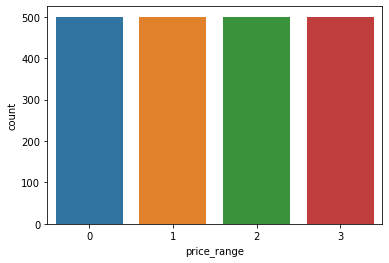

In [83]:
sns.countplot(x=train["price_range"]) #checking for imbalance

In [40]:
train.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<AxesSubplot:>

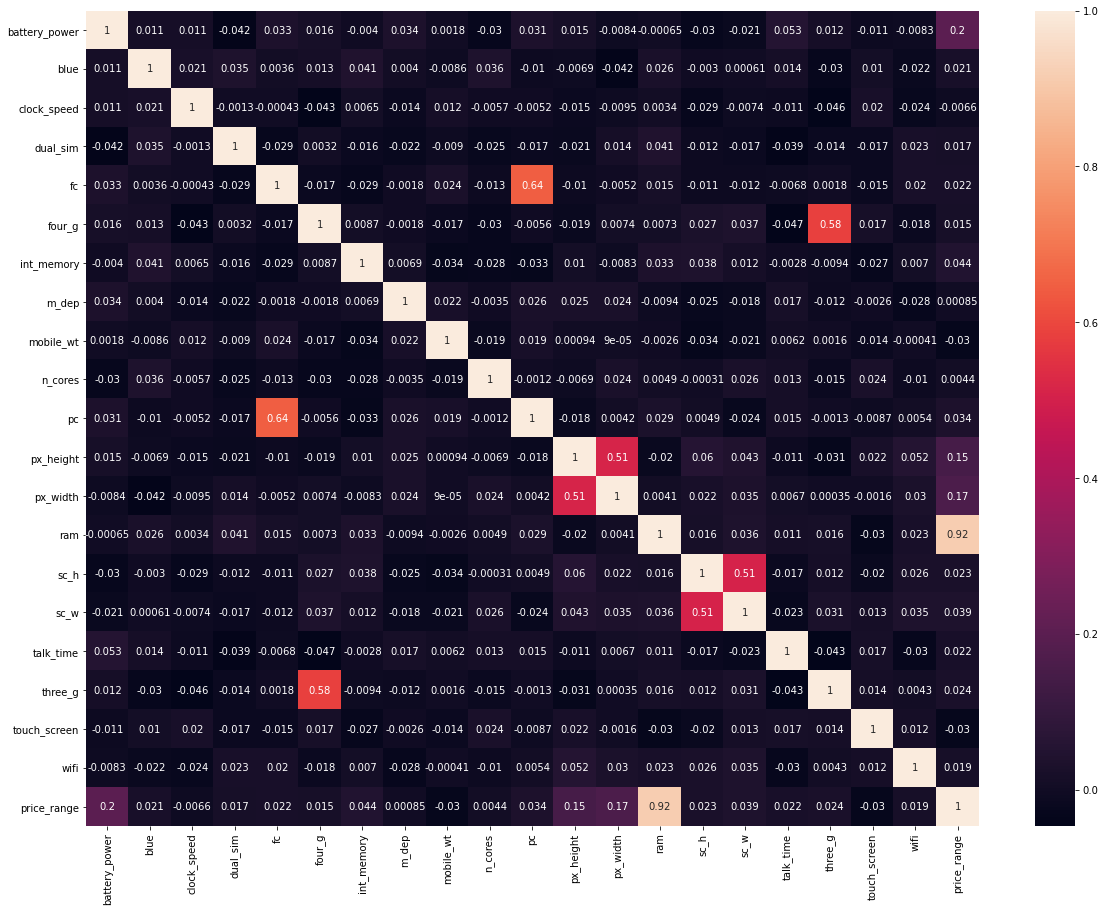

In [118]:
plt.figure(figsize=(20,15))
sns.heatmap(train.corr(),annot = True)

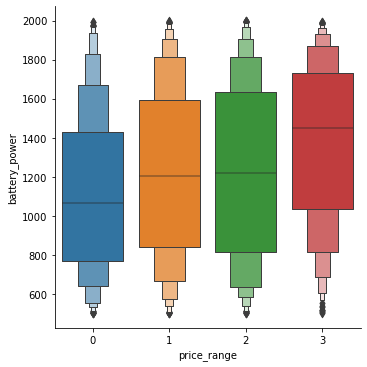

In [100]:
sns.catplot(x="price_range",y="battery_power", data=train, kind="boxen")

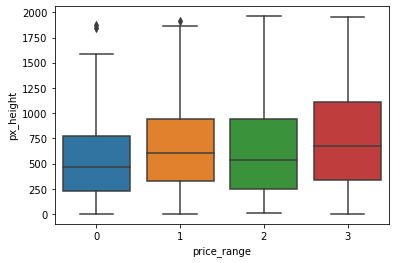

In [107]:
sns.boxplot(x=train['price_range'],y=train['px_height']);

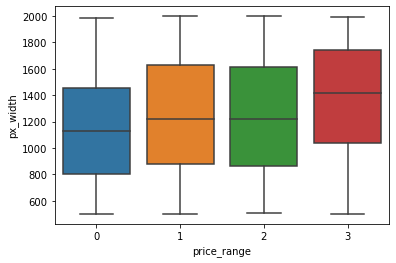

In [113]:
sns.boxplot(x=train['price_range'],y=train['px_width']);

<AxesSubplot:xlabel='price_range', ylabel='ram'>

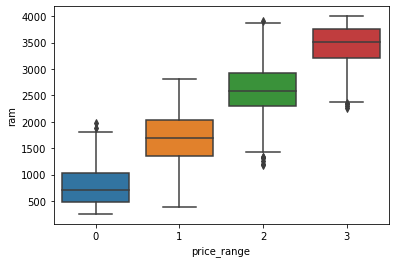

In [112]:
sns.boxplot(x=train['price_range'],y=train['ram'])

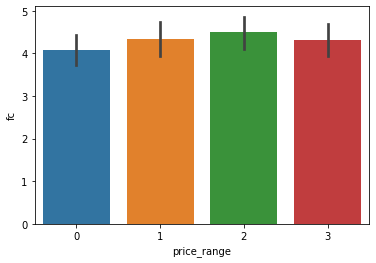

<AxesSubplot:xlabel='price_range', ylabel='fc'>

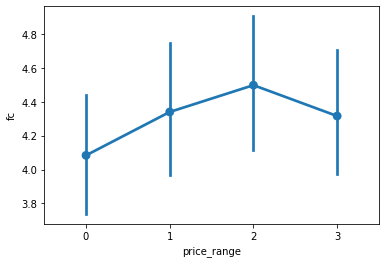

In [160]:
sns.barplot(x=train['price_range'],y=train['fc'])
plt.show()
sns.pointplot(x=train['price_range'],y=train['fc'])

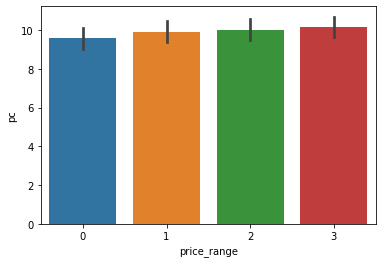

<AxesSubplot:xlabel='price_range', ylabel='pc'>

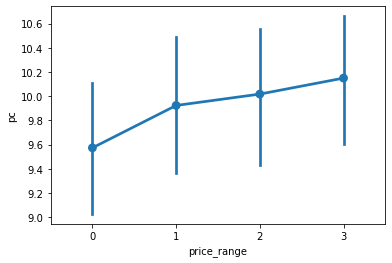

In [161]:
sns.barplot(x=train['price_range'],y=train['pc'])
plt.show()
sns.pointplot(x=train['price_range'],y=train['pc'])

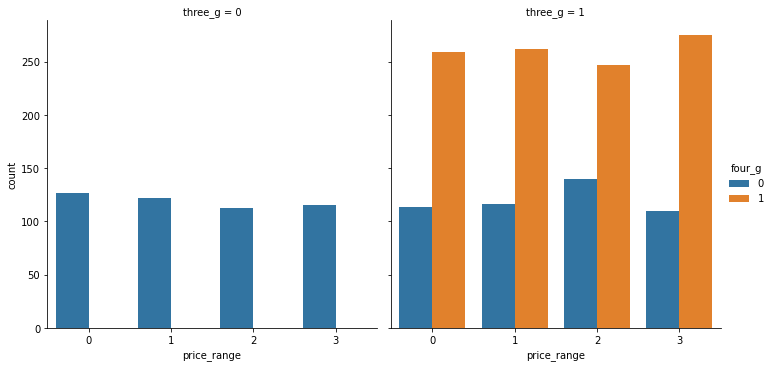

In [99]:
sns.catplot(x='price_range',col='three_g',hue ='four_g',data = train, kind ='count')

In [170]:
num=['battery_power',
     'clock_speed',
     'fc',
     'int_memory',
     'mobile_wt', 
     'n_cores',
     'm_dep',
     'pc', 
     'px_height',
     'px_width', 
     'ram', 
     'sc_h', 
     'sc_w', 
     'talk_time']


cat=['blue',
     'dual_sim',
     'four_g',
     'three_g', 
     'touch_screen',
     'wifi']

In [193]:
train[`((train['ram'] < 1410) & (train['price_range'] == 2))]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
140,1753,0,0.5,1,0,1,31,0.1,134,1,...,1590,1926,1324,17,0,17,1,0,1,2
292,1995,1,1.9,0,6,0,9,0.8,139,6,...,1830,1963,1203,14,12,18,1,1,1,2
588,1966,1,1.4,1,2,0,40,0.9,185,8,...,1197,1987,1185,11,2,20,0,1,0,2
805,1642,1,1.6,1,0,0,5,0.4,102,5,...,1686,1889,1333,18,0,2,0,0,1,2
894,1497,1,0.7,0,5,0,32,0.7,92,3,...,1920,1933,1329,6,1,7,1,1,0,2
924,1966,0,0.8,1,15,1,48,0.2,144,1,...,1242,1973,1252,6,4,19,1,1,1,2


In [190]:
scaler_train = MinMaxScaler()
train1[num]=scaler_train.fit_transform(train1[num])
train1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0,0.68,0,0.052632,0,0.080645,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0,0,1,1
1,0.347361,1,0.00,1,0.000000,1,0.822581,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1,1,0,2
2,0.041416,1,0.00,1,0.105263,1,0.629032,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1,1,0,2
3,0.076152,1,0.80,0,0.000000,0,0.129032,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1,0,0,2
4,0.881764,1,0.28,0,0.684211,1,0.677419,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1,0.00,1,0.000000,1,0.000000,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1,1,0,0
1996,0.977956,1,0.84,1,0.000000,0,0.596774,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1,1,1,2
1997,0.941884,0,0.16,1,0.052632,1,0.548387,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1,1,0,3
1998,0.675351,0,0.16,0,0.210526,1,0.709677,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1,1,1,0


In [196]:
train1.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,0.493033,0.494710,0.409753,0.508312,0.226965,0.521914,0.485569,0.502011,0.503203,0.495113,0.328582,0.502141,0.500394,0.521770,0.321075,0.499496,0.761713,0.501763,0.506801,1.505290
std,0.292848,0.500098,0.326741,0.500057,0.228447,0.499645,0.292760,0.295400,0.327158,0.303232,0.225192,0.287113,0.290617,0.300740,0.241715,0.303209,0.426143,0.500123,0.500080,1.117627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.235805,0.000000,0.080000,0.000000,0.052632,0.000000,0.225806,0.241667,0.285714,0.250000,0.144898,0.252336,0.253608,0.285714,0.111111,0.222222,1.000000,0.000000,0.000000,1.000000
50%,0.486306,0.000000,0.400000,1.000000,0.157895,1.000000,0.483871,0.508333,0.428571,0.500000,0.289286,0.498665,0.510422,0.500000,0.277778,0.500000,1.000000,1.000000,1.000000,2.000000
75%,0.744155,1.000000,0.680000,1.000000,0.368421,1.000000,0.741935,0.750000,0.857143,0.750000,0.482143,0.755007,0.752806,0.785714,0.500000,0.777778,1.000000,1.000000,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [194]:
train2= pd.get_dummies(train1, columns = cat)
standardScaler=StandardScaler()
train2[num]=standardScaler.fit_transform(train2[num])
train2

,battery_power,clock_speed,fc,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,...,dual_sim_0,dual_sim_1,four_g_0,four_g_1,three_g_0,three_g_1,touch_screen_0,touch_screen_1,wifi_0,wifi_1
0,-0.905970,0.827307,-0.763318,-1.383477,1.347628,-1.101719,-1.303337,-1.414164,-1.154005,0.386793,...,1,0,1,0,1,0,1,0,0,1
1,-0.497557,-1.254377,-0.993764,1.151444,-0.119679,-0.664948,-0.643609,0.591436,1.711195,0.462215,...,0,1,0,1,0,1,0,1,1,0
2,-1.542545,-1.254377,-0.532871,0.490161,0.134278,0.208594,-0.643609,1.402741,1.078619,0.436461,...,0,1,0,1,0,1,0,1,1,0
3,-1.423900,1.194662,-0.993764,-1.218156,-0.260766,0.645365,-0.148813,1.296229,1.241414,0.589145,...,1,0,1,0,0,1,1,0,1,0
4,1.327750,-0.397213,2.002041,0.655482,0.021408,-1.101719,0.675847,1.278100,-0.093509,-0.659918,...,1,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.015488,-1.254377,-0.993764,-1.659012,-0.966202,0.645365,0.675847,1.309827,1.483282,-1.343315,...,0,1,0,1,0,1,0,1,1,0
1996,1.656305,1.317114,-0.993764,0.379947,1.319411,-0.228177,-1.138405,0.614099,1.657705,-0.088734,...,0,1,1,0,0,1,0,1,0,1
1997,1.533097,-0.764569,-0.763318,0.214626,-0.909768,1.518907,-1.138405,0.507586,0.883264,0.854042,...,0,1,0,1,0,1,0,1,1,0
1998,0.622725,-0.764569,-0.071978,0.765696,0.134278,0.208594,-0.808541,-0.698040,-1.354011,-1.158439,...,1,0,0,1,0,1,0,1,0,1


In [197]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
train1 = train[~((train['ram'] < 1400) & (train['price_range'] == 2))]
train1 = train1[~((train1['ram'] > 1650) & (train1['price_range'] == 0))]